In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import time

def geckoList(page=1, per_page=250):
    url = "https://api.coingecko.com/api/v3/coins/markets"
    params = {"vs_currency":"usd", "order":"market_cap_desc", "per_page":per_page, "page":page}
    r = requests.get(url, params).json()
    df = pd.DataFrame(r)
    df.set_index('symbol', inplace=True)
    return df

def geckoHistorical(ticker, vs_currency='usd', days='max'):
    url = f"https://api.coingecko.com/api/v3/coins/{ticker}/market_chart"
    params = {"vs_currency":{vs_currency}, "days":days}
    r = requests.get(url, params).json()
    prices = pd.DataFrame(r['prices'])
    market_caps = pd.DataFrame(r['market_caps'])
    total_volumes = pd.DataFrame(r['total_volumes'])
    df = pd.concat([prices, market_caps[1], total_volumes[1]], axis=1)
    df[0] = pd.to_datetime(df[0], unit='ms')
    df.columns = ['date','price','market_caps','total_volumes']
    df.set_index('date', inplace=True)
    return df

In [9]:
lista_ = geckoList(page=1, per_page=58)
lista = lista_['id'].tolist()

In [3]:
symbols = [x.upper() for x in lista_.index.values]

In [10]:
data = []
for coin in lista:
    try:
      data.append(geckoHistorical(coin, days=365)['price'].resample('1D').last())
    except:
      print(f'Fallo en {coin}')  
    time.sleep(1)

df = pd.DataFrame(data).T
df.columns = lista
df = df.loc[df.index >= '2021-11-10']
pd.options.display.max_columns=14
df

,bitcoin,ethereum,tether,usd-coin,binancecoin,ripple,cardano,...,true-usd,helium,maker,compound-usd-coin,the-graph,kucoin-shares,klay-token
date,,,,,,,,,,,,,,,
2021-11-10,67145.374935,4742.080911,1.001149,1.001716,636.927618,1.261712,2.278047,...,0.999907,47.409919,3138.951295,0.022394,1.209834,22.986936,1.599601
2021-11-11,65061.054407,4641.528765,1.005009,1.003782,611.442281,1.188313,2.097095,...,1.005846,49.533657,2959.298052,0.022428,1.088059,22.387507,1.537683
2021-11-12,65005.645160,4732.924450,1.000689,1.001392,629.711420,1.217629,2.085169,...,1.001506,48.749123,3003.659770,0.022396,1.114978,23.301104,1.557216
2021-11-13,64432.047947,4685.106356,1.005498,1.005971,629.095105,1.194213,2.056788,...,1.005568,51.416344,2883.349632,0.022483,1.077460,22.450418,1.569030
2021-11-14,64660.335353,4666.498498,1.004166,1.003622,652.233782,1.193692,2.058331,...,1.004157,51.016572,3151.181979,0.022412,1.101126,23.756389,1.550669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-27,21235.612316,1438.988038,1.001113,1.000248,248.851235,0.336750,0.467789,...,1.000959,8.627434,896.947008,0.022607,0.097265,9.649177,0.246079
2022-07-28,22908.884260,1636.949181,0.999395,1.000709,270.305244,0.359549,0.509188,...,0.999782,9.107500,1009.769206,0.022605,0.110937,10.207509,0.261178
2022-07-29,23822.067598,1723.548521,0.999281,1.002497,276.467954,0.372412,0.513909,...,0.999214,9.205957,1113.679589,0.022644,0.115011,10.342114,0.276381


In [12]:
df.dtypes

bitcoin              float64
ethereum             float64
tether               float64
usd-coin             float64
binancecoin          float64
ripple               float64
cardano              float64
binance-usd          float64
solana               float64
polkadot             float64
dogecoin             float64
matic-network        float64
staked-ether         float64
shiba-inu            float64
dai                  float64
avalanche-2          float64
tron                 float64
wrapped-bitcoin      float64
ethereum-classic     float64
okb                  float64
leo-token            float64
litecoin             float64
ftx-token            float64
uniswap              float64
chainlink            float64
crypto-com-chain     float64
near                 float64
cosmos               float64
stellar              float64
monero               float64
bitcoin-cash         float64
algorand             float64
filecoin             float64
internet-computer    float64
flow          

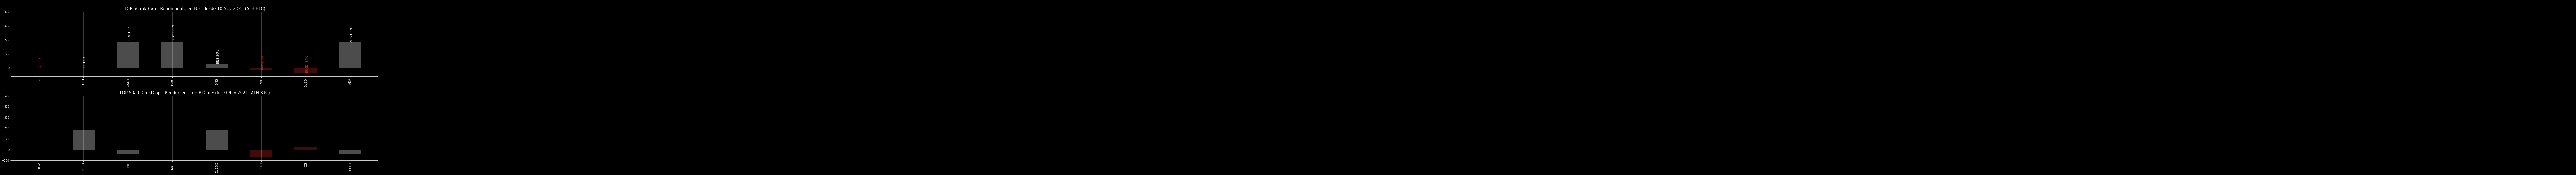

In [15]:
df = df.fillna(method='ffill')
rendimientos_usd = df.iloc[-1] / df.iloc[0] - 1
rendimientos_btc = (df.iloc[-1] / df.iloc[0]) /  (df['bitcoin'].iloc[-1]/df['bitcoin'].iloc[0]) -1

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(24,10), nrows=2)


ax[0].set_title('\nTOP 50 mktCap - Rendimiento en BTC desde 10 Nov 2021 (ATH BTC)', fontsize=15)
colors = []
for i in range(50):
    value = rendimientos_btc.iloc[i]
    if value > 0 :
        colors.append('white')
    else:
        colors.append('tab:red')
    ax[0].annotate(f"{symbols[i]} {value:.0%}", xy = (df.columns[i], value*100+4), rotation=90, fontsize=11, color=colors[i])

ax[0].bar(rendimientos_btc.iloc[:-50].index, (rendimientos_btc*100).iloc[:-50], color=colors[:50], width=0.5, alpha=0.3)
ax[0].grid(alpha=0.3)
ax[0].set_xticklabels(symbols, rotation = 90, fontsize=11)
ax[0].set_ylim(-60,400)


ax[1].set_title('\nTOP 50/100 mktCap - Rendimiento en BTC desde 10 Nov 2021 (ATH BTC)', fontsize=15)
for i in range(50):
    value = rendimientos_btc.iloc[i]
    if value > 0 :
        colors.append('white')
    else:
        colors.append('tab:red')
    ax[1].annotate(f"{symbols[i]} {value:.0%}", xy = (df.columns[i], value*100+4), rotation=90, fontsize=11, color=colors[i])

ax[1].bar(rendimientos_btc.iloc[50:].index, (rendimientos_btc*100).iloc[50:], color=colors[50:], width=0.5, alpha=0.3)
ax[1].grid(alpha=0.3)
ax[1].set_xticklabels(symbols[50:], rotation = 90, fontsize=11)
ax[1].set_ylim(-100,500)

plt.subplots_adjust(hspace=0.3)
plt.show()

In [3]:
!pip install web3

     ------------------------------------- 501.2/501.2 kB 10.4 MB/s eta 0:00:00
     ------------------------------------- 903.8/903.8 kB 19.4 MB/s eta 0:00:00
     ---------------------------------------- 101.8/101.8 kB ? eta 0:00:00
     ---------------------------------------- 82.6/82.6 kB 4.5 MB/s eta 0:00:00
     ---------------------------------------- 76.7/76.7 kB ? eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 45.1/45.1 kB ? eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 110.6/110.6 kB ? eta 0:00:00
     ---------------------------------------- 1.9/1.9 MB 31.2 MB/s eta 0:00:00
     ------------------------------------- 321.4/321.4 kB 20.7 MB/s eta 0:00:00
     ---------------------------------------- 55.8/55.8 kB 2.8 MB/s eta 0:00:00
  Preparing metadata 

ERROR: Could not install packages due to an OSError: [WinError 5] Acceso denegado: 'C:\\Users\\alan.matys\\Miniconda3\\envs\\price_li_bin\\Lib\\site-packages\\~ebsockets\\speedups.cp310-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [2]:
from web3 import Web3

from balancer import Pool
import keys


w3 = Web3(Web3.HTTPProvider('https://mainnet.infura.io/v3/'+keys.INFURA_ID))


weth_bal = Pool(w3, '0x59A19D8c652FA0284f44113D0ff9aBa70bd46fB4')
print(weth_bal.final_tokens())
print(weth_bal.get_normalized_weight(weth_bal.final_tokens()[0]))


ModuleNotFoundError: No module named 'web3'